# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

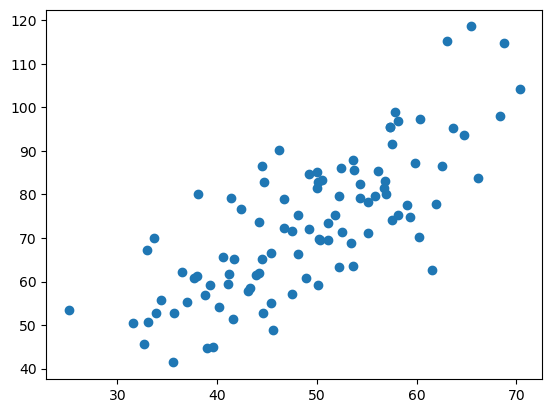

In [2]:
# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [17]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X,weights)
        
        #2) Estimate the gradient
        gradient = (-2*inv_N) * np.dot(X.T, (y-y_hat))
        gradient_norm = np.linalg.norm(gradient)
        
        print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights -= alpha * gradient
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights
    

Now, test your implementation:

In [18]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.776579805078
Epoch  1  weights:  [[0.0146299 ]
 [0.74243353]] gradient_norm:  3703.3612440799275
Epoch  2  weights:  [[0.02196252]
 [1.11269705]] gradient_norm:  1846.9294028442373
Epoch  3  weights:  [[0.02565587]
 [1.29735306]] gradient_norm:  921.0953494141264
Epoch  4  weights:  [[0.02753425]
 [1.38944344]] gradient_norm:  459.36636312599325
Epoch  5  weights:  [[0.02850748]
 [1.43536977]] gradient_norm:  229.09469222476093
Epoch  6  weights:  [[0.02902929]
 [1.45827329]] gradient_norm:  114.25516148926224
Epoch  7  weights:  [[0.02932597]
 [1.46969496]] gradient_norm:  56.984479905883866
Epoch  8  weights:  [[0.02951038]
 [1.47539042]] gradient_norm:  28.42611872105721
Epoch  9  weights:  [[0.02963879]
 [1.47823013]] gradient_norm:  14.190593492850745
Epoch  10  weights:  [[0.02973928]
 [1.47964563]] gradient_norm:  7.105101264507278
Epoch  11  weights:  [[0.02982583]
 [1.48035084]] gradient_norm:  3.5990524904816015
Epoch  12 

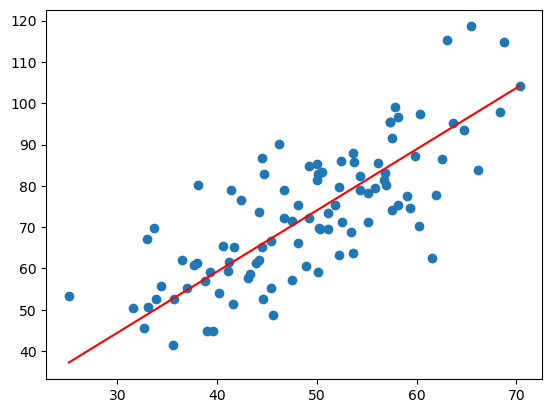

In [19]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

#Your answer

In steps 3, The stopping criterion involves checking the convergence of the optimization process. In this case, it monitors the change in the gradient norm between consecutive iterations. When the change in the gradient norm becomes smaller than epsilon, it suggests that the optimization is approaching convergence or stability. At this point, the loop terminates, and the algorithm stops iterating.

In steps 5, 


### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

### Learning rate(alpha)

Increasing learning rate to 0.001, 0.01 and 1 respectively. Learning rate; an increase in the learning rate would increase the number of steps taken to learn, making the model to not train efficiently as there are huge jumps in the training steps. Learning rate (Lr) is very important to a model, as it shows how much steps the model takes to learn, typically you want a small digit lr because the model learns more efficiently that way.

In [16]:
alpha = 0.001
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  3712.888289902539
Epoch  1  weights:  [[0.07314948]
 [3.71216764]] gradient_norm:  5593.150168510838
Epoch  2  weights:  [[-0.03613281]
 [-1.87991481]] gradient_norm:  8425.604653802178
Epoch  3  weights:  [[0.12940279]
 [6.54406357]] gradient_norm:  12692.456252789692
Epoch  4  weights:  [[-0.11905141]
 [-6.14596071]] gradient_norm:  19120.105012666703
Epoch  5  weights:  [[ 0.25613476]
 [12.97046288]] gradient_norm:  28802.810776832775
Epoch  6  weights:  [[ -0.30814023]
 [-15.82682002]] gradient_norm:  43388.98286088717
Epoch  7  weights:  [[ 0.54280301]
 [27.55381771]] gradient_norm:  65361.8095933725
Epoch  8  weights:  [[ -0.73815959]
 [-37.79543851]] gradient_norm:  98462.00283294324
Epoch  9  weights:  [[ 1.19241247]
 [60.64763587]] gradient_norm:  148324.6266012875
Epoch  10  weights:  [[ -1.71491911]
 [-87.64849449]] gradient_norm:  223438.42521449795
Epoch  11  weights:  [[  2.66563933]
 [135.7469857 ]] gradient_norm:  336590.

C:\Users\boyoski\AppData\Local\Temp\ipykernel_19968\3813022531.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:


In [13]:
alpha = 0.01
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  3712.888289902539
Epoch  1  weights:  [[ 0.73149475]
 [37.12167643]] gradient_norm:  89347.49601654794
Epoch  2  weights:  [[ -16.78018701]
 [-856.18165696]] gradient_norm:  2150071.442840392
Epoch  3  weights:  [[  404.71461261]
 [20640.40093343]] gradient_norm:  51739639.2227903
Epoch  4  weights:  [[  -9738.10793196]
 [-496656.56391488]] gradient_norm:  1245070379.3210015
Epoch  5  weights:  [[  234340.37448113]
 [11951654.59224912]] gradient_norm:  29961558927.52552
Epoch  6  weights:  [[-5.63920046e+06]
 [-2.87606358e+08]] gradient_norm:  720999413589.0869
Epoch  7  weights:  [[1.35702561e+08]
 [6.92100224e+09]] gradient_norm:  17350237204053.922
Epoch  8  weights:  [[-3.26556662e+09]
 [-1.66548028e+11]] gradient_norm:  417518690533222.6
Epoch  9  weights:  [[7.85830811e+10]
 [4.00783654e+12]] gradient_norm:  1.0047231913569814e+16
Epoch  10  weights:  [[-1.89103496e+12]
 [-9.64451750e+13]] gradient_norm:  2.4177808422452704e+17
Epo

C:\Users\boyoski\AppData\Local\Temp\ipykernel_19968\3813022531.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\boyoski\AppData\Local\Temp\ipykernel_19968\3813022531.py:39: RuntimeWarning: invalid value encountered in subtract
  weights = weights - alpha * gradient


In [14]:
alpha = 1
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  3712.888289902539
Epoch  1  weights:  [[  73.14947525]
 [3712.16764271]] gradient_norm:  9302325.540518574
Epoch  2  weights:  [[ -182285.46615104]
 [-9296825.76287997]] gradient_norm:  23306184867.471443
Epoch  3  weights:  [[4.56702582e+08]
 [2.32924093e+10]] gradient_norm:  58391662462338.945
Epoch  4  weights:  [[-1.14422944e+12]
 [-5.83571490e+13]] gradient_norm:  1.462953402499823e+17
Epoch  5  weights:  [[2.86676948e+15]
 [1.46208870e+17]] gradient_norm:  3.665305229605684e+20
Epoch  6  weights:  [[-7.18244693e+18]
 [-3.66313878e+20]] gradient_norm:  9.183110277619666e+23
Epoch  7  weights:  [[1.79950094e+22]
 [9.17768243e+23]] gradient_norm:  2.3007501173373263e+27
Epoch  8  weights:  [[-4.50849645e+25]
 [-2.29939022e+27]] gradient_norm:  5.764333588945882e+30
Epoch  9  weights:  [[1.12956541e+29]
 [5.76092647e+30]] gradient_norm:  1.444204717159992e+34
Epoch  10  weights:  [[-2.83002999e+32]
 [-1.44335109e+34]] gradient_norm:  3

C:\Users\boyoski\AppData\Local\Temp\ipykernel_19968\3813022531.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\boyoski\AppData\Local\Temp\ipykernel_19968\3813022531.py:39: RuntimeWarning: invalid value encountered in subtract
  weights = weights - alpha * gradient


### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [ ]:

# Your code here

### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.